# AI and Machine Learning CA1 (classification)

Name: Kendrick Slamat

Class: DAAA/FT/1B/03

Admin No: p2510877

# Task Overview

We will be predicting the status of a factory machine based on information collected from different machines tabulated on a dataset collected from a manufacturing factory, using a machine learning model to predict if a given machine is working or faulty.

### Why this problem matters
Predicting machine status is crucial for manufacturing because it enables:
- Proactive maintenance and early detection of faults
- Reduced costly downtime and prevention of unexpected breakdowns
- Improved operational efficiency and optimized resource allocation
- Enhanced product quality and consistency
- Data-driven decision-making and cost savings through predictive maintenance
Machine learning transforms raw sensor data into actionable insights, supporting smarter factory operations

# Learning Objectives

Within this assignment, I will be creating a classification model with the proper supervised machine learning workflow.

- Data Loading and Cleaning: Loading datasets from files and handling missing values, duplicates, and inconsistencies to ensure data quality.

-   Data Visualization: Using numpy, pandas, matplotlib and seaborn to further analyse relationships between data and view distributions with different plots to gain a visual understanding of the data.

-   Data Preprocessing: Using numpy and pandas to read data, analyse features, prepare data by cleaning and formatting data for the model to understand.

-   Model Hyperparameter Tuning: Using scikit-learn to use different algorithms and experiment with different hyperparameters to see which works best for the model to do well and train data with the highest appropriate accuracy.

-   Evaluation Metrics: Using scikit-learn, matplotlib and seaborn to evaluate data using metrics such as recall, precision and F1 score to gain a better understanding of how well different algorithms perform using the same dataset.

-   Feature Analysis: Find out which features are the most important and significantly impact the outcome of the model.

Firstly, we will import all used methods from the libraries used: scikit-learn, numpy, pandas, matplotlib and seaborn.


In [1]:
# Import necessary libraries to be used.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, make_scorer, recall_score
from sklearn.pipeline import Pipeline
import warnings
from catppuccin import PALETTE

warnings.filterwarnings("ignore")
# Create a color palette for matplotlib and seaborn
flavour = PALETTE.mocha
sns.set_palette([c.hex for c in flavour.colors])
plt.style.use(flavour.identifier) 
sns.set_theme(
        context="notebook",
        style="darkgrid",
        rc={
            "figure.facecolor": flavour.colors.mantle.hex,
            "axes.facecolor": flavour.colors.base.hex,
            "axes.edgecolor": flavour.colors.surface0.hex,
            "grid.color":     flavour.colors.surface1.hex,
            "text.color":        flavour.colors.text.hex,
            "axes.labelcolor":   flavour.colors.text.hex,
            "xtick.color":       flavour.colors.subtext0.hex,
            "ytick.color":       flavour.colors.subtext0.hex,
        },
    )


# Step 1: Data Loading

#### Extracting Data from the CSV file

We will be extracting data from the dataset given from the CSV file. We will then do a little preview and primer of the key features of this dataset. This will allow us to identify the data types and type of variables that are within this dataset. It also tells us useful information on the number of rows of our dataset, and shows us how a few rows of our dataset would look like.


In [ ]:
# Read dataset, replace file path with dataset file path.
df = pd.read_csv("datasets/factory_data.csv")

In [3]:
# Show info on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unique ID             20000 non-null  int64  
 1   Product ID            20000 non-null  object 
 2   Quality               19009 non-null  object 
 3   Ambient T (C)         20000 non-null  float64
 4   Process T (C)         19600 non-null  float64
 5   Rotation Speed (rpm)  18812 non-null  float64
 6   Torque (Nm)           20000 non-null  float64
 7   Tool Wear (min)       20000 non-null  int64  
 8   Machine Status        20000 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 1.4+ MB


In [4]:
# Show first few rows of dataset
df.head()

,Unique ID,Product ID,Quality,Ambient T (C),Process T (C),Rotation Speed (rpm),Torque (Nm),Tool Wear (min),Machine Status
0,1,K12965,M,24.95,35.45,1551.0,42.8,0,0
1,2,Z62710,L,25.05,35.55,1408.0,46.3,3,0
2,3,T20224,L,24.95,35.35,1498.0,49.4,5,0
3,4,Z33024,L,25.05,35.45,1433.0,39.5,7,0
4,5,Z52839,L,25.05,35.55,1408.0,40.0,9,0


In [5]:
# Show a description of numerical features
df.describe()

,Unique ID,Ambient T (C),Process T (C),Rotation Speed (rpm),Torque (Nm),Tool Wear (min),Machine Status
count,20000.000000,20000.000000,19600.000000,18812.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,26.904930,36.904291,1538.795397,39.986910,107.951000,0.033900
std,5773.647028,2.000834,1.483647,178.674963,9.968684,63.652555,0.180976
min,1.000000,22.150000,32.550000,1168.000000,3.800000,0.000000,0.000000
25%,5000.750000,25.250000,35.750000,1423.000000,33.200000,53.000000,0.000000
50%,10000.500000,26.950000,36.950000,1503.000000,40.100000,108.000000,0.000000
75%,15000.250000,28.450000,37.950000,1613.000000,46.800000,162.000000,0.000000
max,20000.000000,31.450000,40.750000,2886.000000,76.600000,253.000000,1.000000


In [6]:
print("Summary of dataset: ")
print(f"Total Samples: {df.shape[0]}")
print(f"Total Features: {df.shape[1]}")
print(f"\nFeature Types:")
print(df.dtypes.value_counts())

Summary of dataset: 
Total Samples: 20000
Total Features: 9

Feature Types:
float64    4
int64      3
object     2
Name: count, dtype: int64


## Reflection

We took a quick look at the dataset through various pandas methods such as head, describe and info. This tells us a lot of useful information about the dataset. From this alone, we can conclude that the dataset itself has 20000 rows of data. We are also exposed to a preview of the data, and we can see a mix of numerical and categorical features. In the future, we will be dealing with data on a more deeper level, by analyzing data trends and identifying potential pitfalls that could cause our model to perform worse than expected.


# Step 2: Data Cleaning / Explanatory Data Analysis

We can see that our dataset gives us 8 features to work with, with the target feature to be "Machine Status".
We can see that the dataset also yields different features with different data types.
Based on the data, we can categorize and determine if the features are necessary to help the model in its predictions.
We can also see that the count of some of the features is not 20000. This means that we have missing data within our dataset.

Dataset Overview:

    Unique ID: A unique identifier for each machine. (number, discrete)

    Product ID: Identifies the specific product being manufactured. (string, nominal)

    Quality: Categorises operational quality as L (Low), M (Medium), and H (High). (string, ordinal)

    Ambient Temperature (°C): The temperature surrounding the machine. (number, continuous)

    Process Temperature (°C): The operating temperature during the manufacturing process. (number, continuous)

    Rotation Speed (rpm): The machine's rotational speed. (number, continuous)

    Torque (Nm): The torque exerted by the machine. (number, continuous)

    Tool Wear (min): The duration the tool has been in use. (number, continuous)

    Machine Status: The target variable where 0 indicates normal operation, and 1 indicates a fault. (number, discrete)

Let's proceed by checking if our dataset contains any missing values.


In [7]:
# Check for null values
df.isnull().sum()

Unique ID                  0
Product ID                 0
Quality                  991
Ambient T (C)              0
Process T (C)            400
Rotation Speed (rpm)    1188
Torque (Nm)                0
Tool Wear (min)            0
Machine Status             0
dtype: int64

There is missing data within our dataset. Let's try to check for duplicates in our entire dataset.


In [8]:
# Check for duplicates
duplicates = df[df.duplicated()]

if not duplicates.empty: 
    print(duplicates.head(5))
else:
    print("No duplicates found in the Dataset.")

No duplicates found in the Dataset.


Great! No duplicates were found in our dataset.

To tackle the problem of missing values, we will impute (replace) these missing values with appropriate aggregated values. This approach preserves data integrity while addressing missing data.

We will impute data appropriately for each feature based on its type and distribution.

There are 991 missing values in Quality, 400 missing values in Process T(C), and 1188 missing values in Rotation Speed(rpm).

Quality is a categorical variable while Process Temperature and Rotation Speed are numerical variables. For Quality, we will impute values using the most frequent value (mode), and for Process Temperature and Rotation Speed, we will impute values using the mean of the dataset.

In order for the Quality variable to be imputed, we must first encode it from a categorical variable to a discrete numerical variable with 3 distinct categories. We will map "L" as 1, "M" as 2, and "H" as 3.

This data cleaning process prepares our dataset for preprocessing and ensures compatibility with our machine learning model.


In [9]:
# Convert Quality from a categorical feature into a discrete numerical feature (ordinal encoding)
df.loc[df["Quality"] == "L","Quality"] = 0
df.loc[df["Quality"] == "M","Quality"] = 1
df.loc[df["Quality"] == "H","Quality"] = 2

# For Quality, we will take the most frequent value
imputer = SimpleImputer(strategy="most_frequent")
df[["Quality"]] = imputer.fit_transform(df[["Quality"]])
df["Quality"] = df["Quality"].astype("category")

# For Process and Rotation Speed, we will take the mean(average) value.
imputer = SimpleImputer(strategy="mean")
df[["Process T (C)"]] = imputer.fit_transform(df[["Process T (C)"]])
df[["Rotation Speed (rpm)"]] = imputer.fit_transform(df[["Rotation Speed (rpm)"]])

# Do a deep copy of our dataset for future use.
ori_df = copy.deepcopy(df)

df.isnull().sum()

Unique ID               0
Product ID              0
Quality                 0
Ambient T (C)           0
Process T (C)           0
Rotation Speed (rpm)    0
Torque (Nm)             0
Tool Wear (min)         0
Machine Status          0
dtype: int64

We have cleared out all the missing data from our dataset. Now let's check to see if our data has any outliers.
To do this, we will use the interquartile range method to determine outliers within each of our features.


In [10]:
# Check for outliers using boxplots for numerical features
numerical_cols = ["Ambient T (C)", "Process T (C)", "Rotation Speed (rpm)", "Torque (Nm)", "Tool Wear (min)"]
for column in numerical_cols:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1   
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"{column}: {len(outliers)} outliers detected.")

Ambient T (C): 0 outliers detected.
Process T (C): 0 outliers detected.
Rotation Speed (rpm): 955 outliers detected.
Torque (Nm): 138 outliers detected.
Tool Wear (min): 0 outliers detected.


Here are the outliers that are visualised by the outlier points shown as dots on the boxplots.


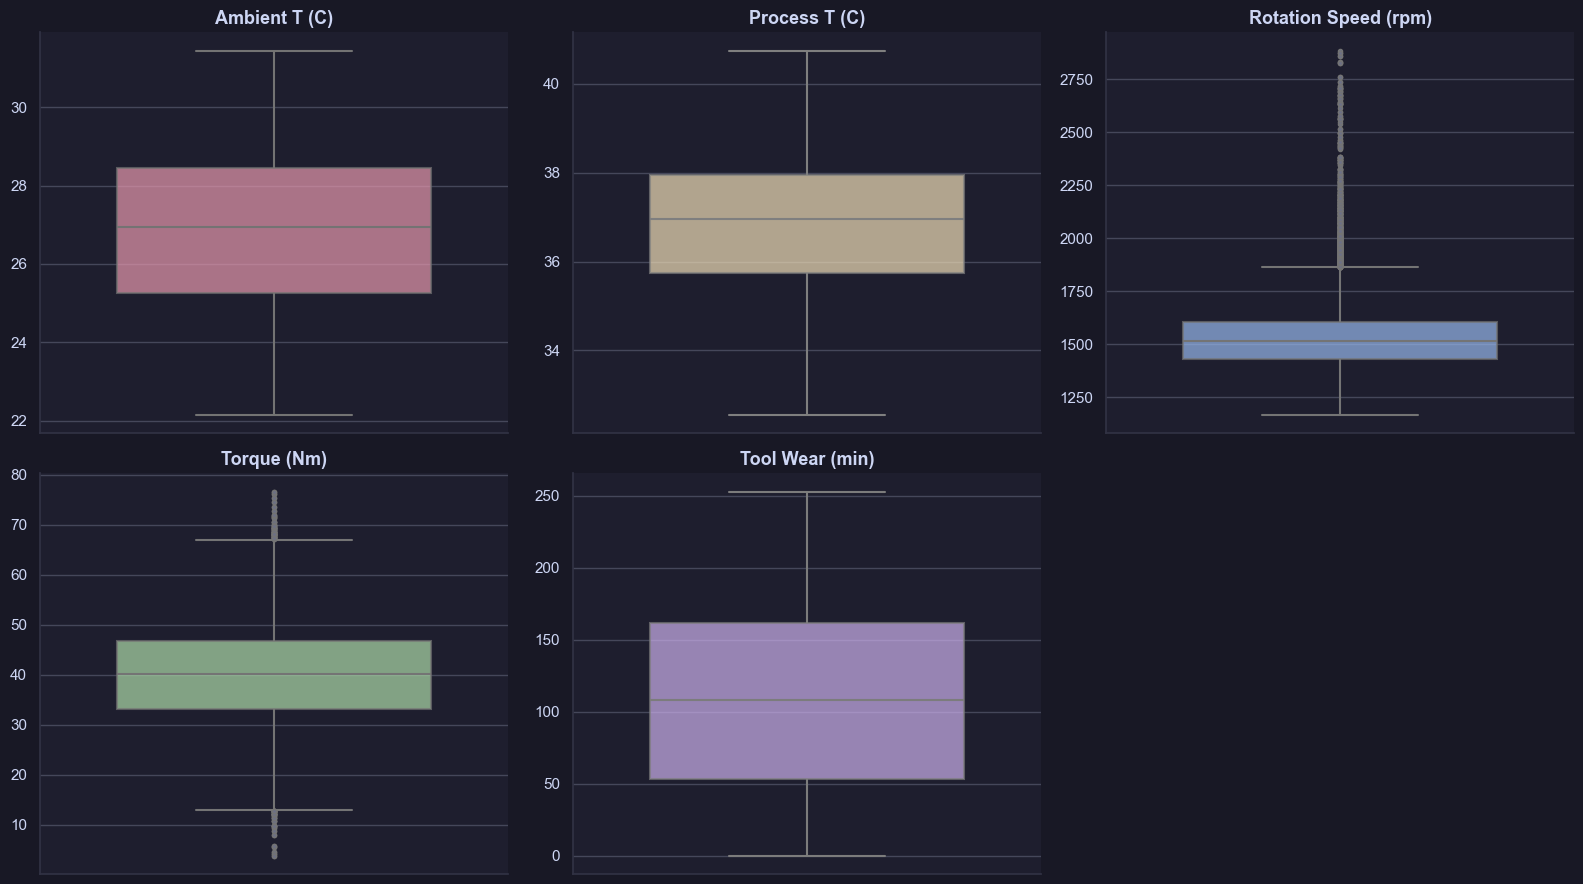

In [11]:
plt.figure(figsize=(16, 9))
box_colors = [flavour.colors.red.hex, flavour.colors.yellow.hex, flavour.colors.blue.hex, flavour.colors.green.hex, flavour.colors.mauve.hex]
# Create boxplots for different features to show outliers visualized.
num = 1
for idx, col in enumerate(numerical_cols):
    plt.subplot(2, 3, num)
    ax = sns.boxplot(
        data=df,
        y=col,
        width=0.67,
        color=box_colors[idx % len(box_colors)],
        linewidth=1.5,
        fliersize=3,
        boxprops=dict(alpha=0.7)
    )
    ax.set_ylabel("")
    ax.set_title(col, fontsize=13, fontweight='bold')
    sns.despine()
    num += 1

plt.tight_layout()
plt.show()
num = 1

There are outliers as shown above for features (Torque with roughly 138 outliers, and Rotation Speed with roughly 955 outliers.)

I have considered not to exclude these outliers from the dataset because they are **real measurements** that were taken, and removing them could potentially make us lose important information for training our model. Natural measurements often produce a wide range of measurements hence the Interquartile rule can sometimes potentially mark it down as a flawed outlier when it is not.

Lastly, let's see if our dataset is balanced.


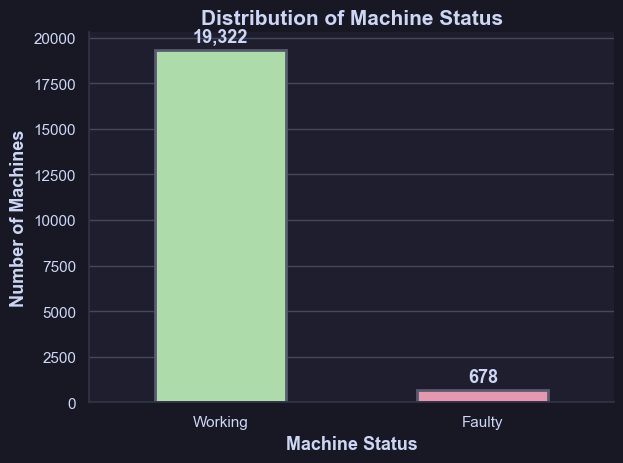

In [12]:
# Count the number of each machine status
status_count = df["Machine Status"].value_counts().to_frame(name="count")

# Prepare status_count for plotting
status_count_plot = status_count.reset_index()
status_count_plot["Machine Status"] = status_count_plot["Machine Status"].map({0: "Working", 1: "Faulty"})

# Create barplot to see distribution of feature
ax = sns.barplot(
    data=status_count_plot,
    x="Machine Status",
    y="count",
    width=0.5,
    palette=[flavour.colors.green.hex, flavour.colors.red.hex],
    edgecolor=flavour.colors.surface2.hex,
    linewidth=2
)
sns.despine()
for i, v in enumerate(status_count_plot["count"]):
    ax.text(i, v + 200, f"{v:,}", ha='center', va='bottom', fontsize=13, fontweight='bold', color=flavour.colors.text.hex)
ax.set_ylabel("Number of Machines", fontsize=13, fontweight='bold')
ax.set_xlabel("Machine Status", fontsize=13, fontweight='bold')
ax.set_title("Distribution of Machine Status", fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

We will carry out SMOTE (Synthetic Minority Oversampling Technique) to generate more samples for the minority class during training.

## Reflection

In summary, we performed explanatory data analysis (EDA) on our dataset, by cleaning and imputing missing data into the dataset. After checking for outliers, we moved on to check for duplicates within the dataset, which can be a big problem if the model sees multiple of the same machine type (lack diversity). Lastly we moved on to checking and scanning for outliers with the interquartile range as a method to determine if the data point is an outlier or not. Lastly, we also concluded that our dataset is severely imbalanced. This will make sure our dataset is ready to be further processed by our machine learning models, and it also helps us visualize relationships, or follow trends in data itself.


# Step 3 : Data Visualization

In this section, We will be visualizing all our features using matplotlib and seaborn to get a better view of both categorical and numerical features, within a cleaned dataset that has been preprocessed. This will help us better visualise trends, and perform feature engineering to see which variables can be dropped or if any variables have similar relationships, they can be merged.

We will be using a pairplot to visualize relationships between features as well as a correlation matrix to numerically identify the strength and direction of feature relationships.


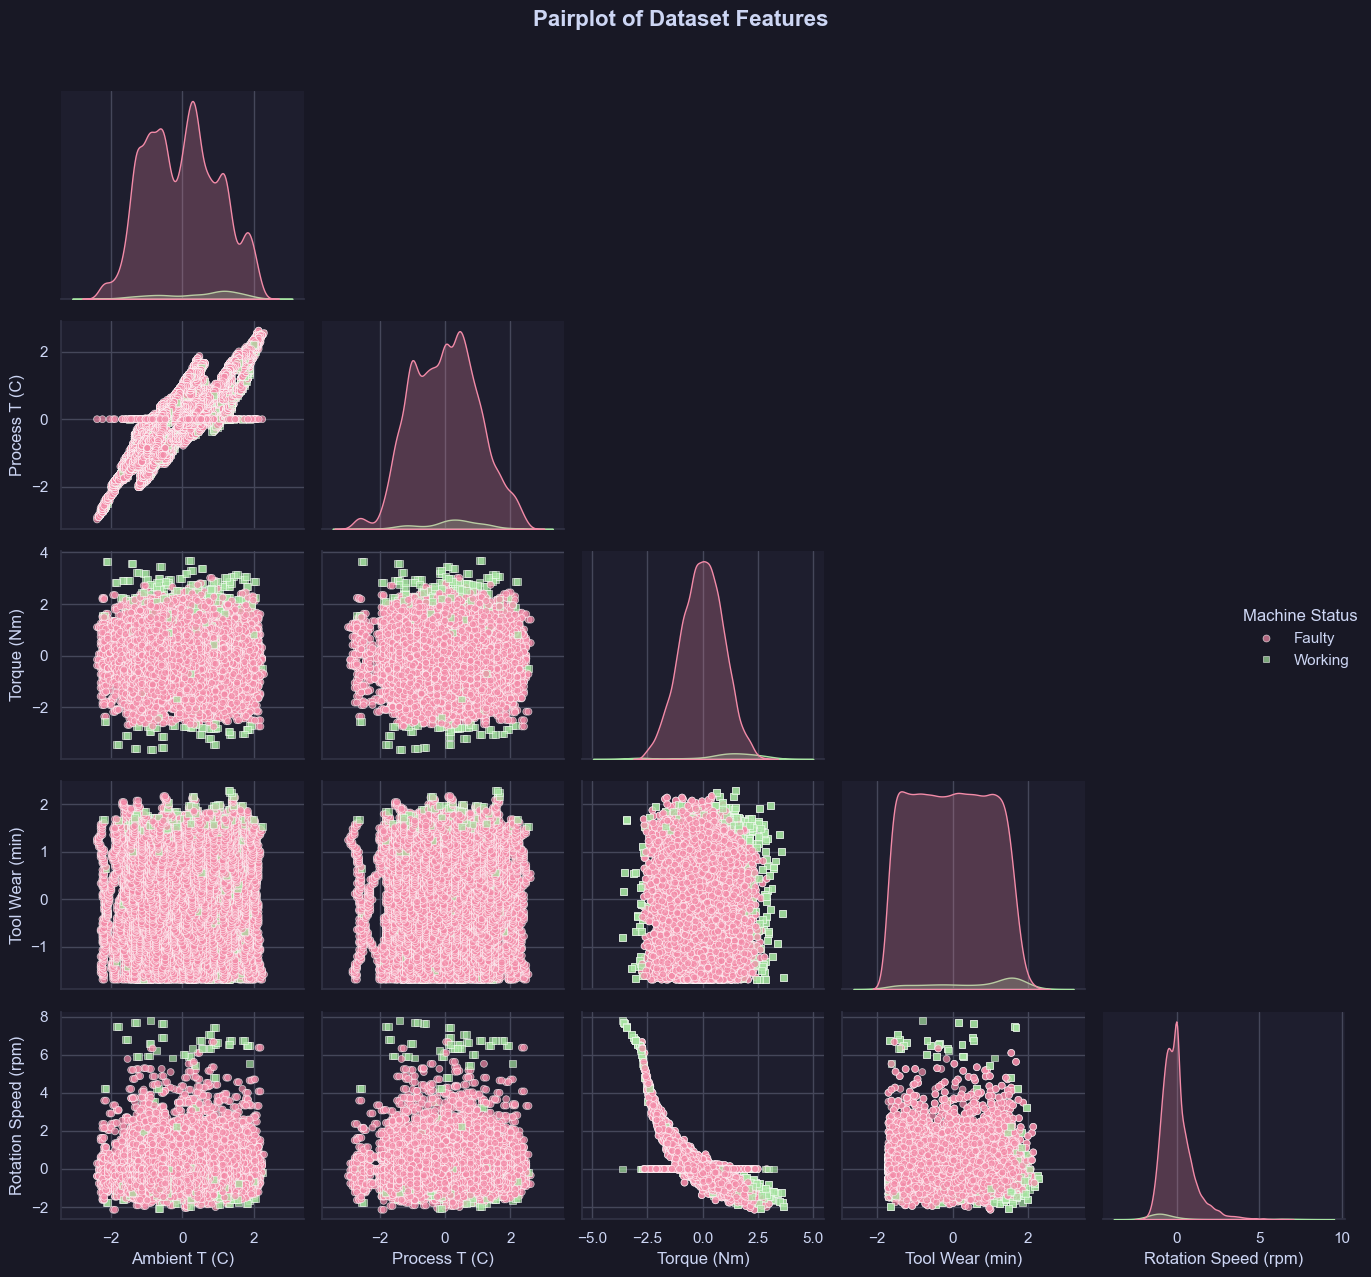

In [13]:
# Use StandardScaler to scale features to normalize them, with mean = 0 and s.d. = 1
scaled = pd.DataFrame(StandardScaler().fit_transform(df[["Ambient T (C)", "Process T (C)", "Torque (Nm)", "Tool Wear (min)", "Rotation Speed (rpm)"]]),columns=["Ambient T (C)", "Process T (C)", "Torque (Nm)", "Tool Wear (min)", "Rotation Speed (rpm)"])

# color palette for pairplot
pairplot_palette = [flavour.colors.red.hex, flavour.colors.green.hex]
pairplot_kwargs = dict(
    diag_kind="kde",
    corner=True,
    plot_kws=dict(alpha=0.7, s=25, edgecolor="w", linewidth=0.5),
    markers=["o", "s"],
    palette=pairplot_palette,
    hue="Machine Status"
)
# plot a pairplot
scaled = pd.concat([scaled, df["Machine Status"]], axis=1)
ax = sns.pairplot(data=scaled, **pairplot_kwargs)
plt.suptitle('Pairplot of Dataset Features', y=1.02, fontsize=16, fontweight='bold')
ax._legend.texts[0].set_text("Faulty")
ax._legend.texts[1].set_text("Working")
plt.tight_layout()
plt.show()

This pairplot shows the relations between different features, and the spread of data to see if we can visualize any trends.

Some trends we can see from this plot:

1. **Torque** and **Rotation Speed** have a non-linear relationship, where failures appear more clustered within lower torques (absolute value).
2. The graph is dominated with faults, because the dataset is predominantly faulty.
3. **Ambient Temperature** and **Process Temperature** do not have any relationship between each other.
4. However when compared to other features, both **Ambient Temperature** and **Process Temperature** share similar distributions and graph shapes.


#### Correlation Matrix

We will construct a correlation matrix to visualize the strength and direction of relationships between our numerical features. This heatmap will help us identify:

- **Highly correlated features** that may be redundant (correlation close to +1 or -1)
- **Independent features** with weak correlations (close to 0)
- **Potential multicollinearity issues** that could affect model performance

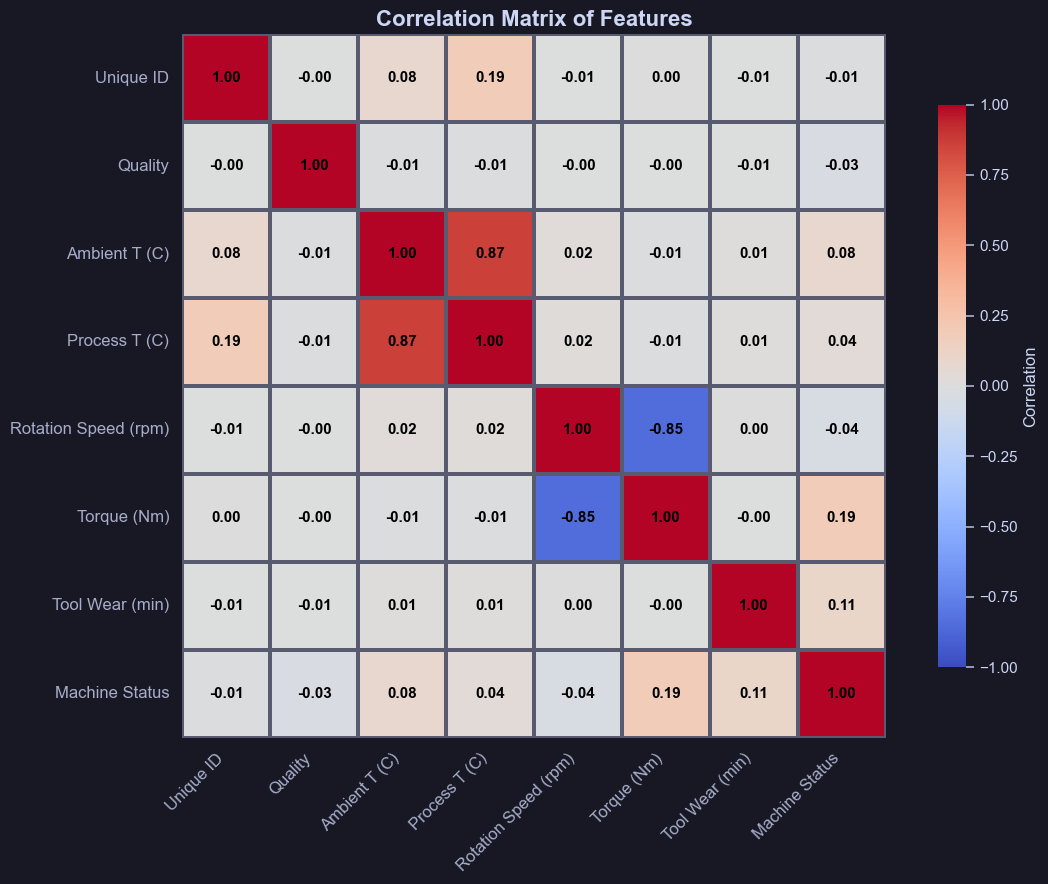

In [14]:
# Plot a correlation heatmap to visualize relationships between features.
plt.figure(figsize=(12, 9))
sns.heatmap(
    df.drop("Product ID", axis=1).corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=1.5,
    linecolor=flavour.colors.surface2.hex,
    cbar_kws={"shrink": 0.8, "label": "Correlation"},
    square=True,
    vmin=-1,
    vmax=1,
    annot_kws={"fontsize": 11, "fontweight": "bold", "color": "#000000"}
)
plt.title("Correlation Matrix of Features", fontsize=16, fontweight="bold", color=flavour.colors.text.hex)
plt.xticks(rotation=45, ha="right", fontsize=12, color=flavour.colors.subtext0.hex)
plt.yticks(rotation=0, fontsize=12, color=flavour.colors.subtext0.hex)
plt.tight_layout()
plt.show()

We can see that Ambient Temperature and Process Temperature are somewhat related. It has a strong positive relationship with a value of 0.87. 
However, Rotation speed and torque have a strong negative relationship with a value of 0.85, showing that they are almost inversely proportional.

#### Individual Feature Analysis

We will now display both our numerical and categorical features by visualizing them using boxplots to see the distribution of data and values, as well as a bar chart for categorical features to show the count of each categorical feature in the datset itself.

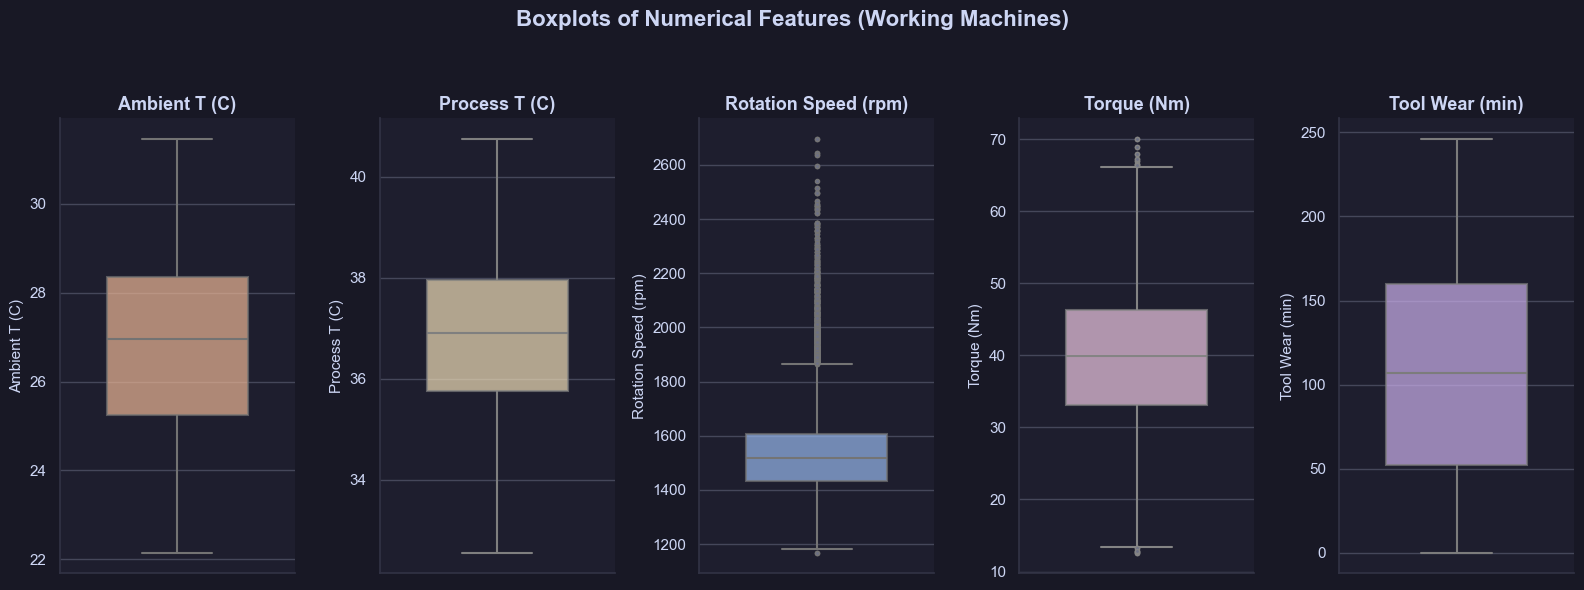

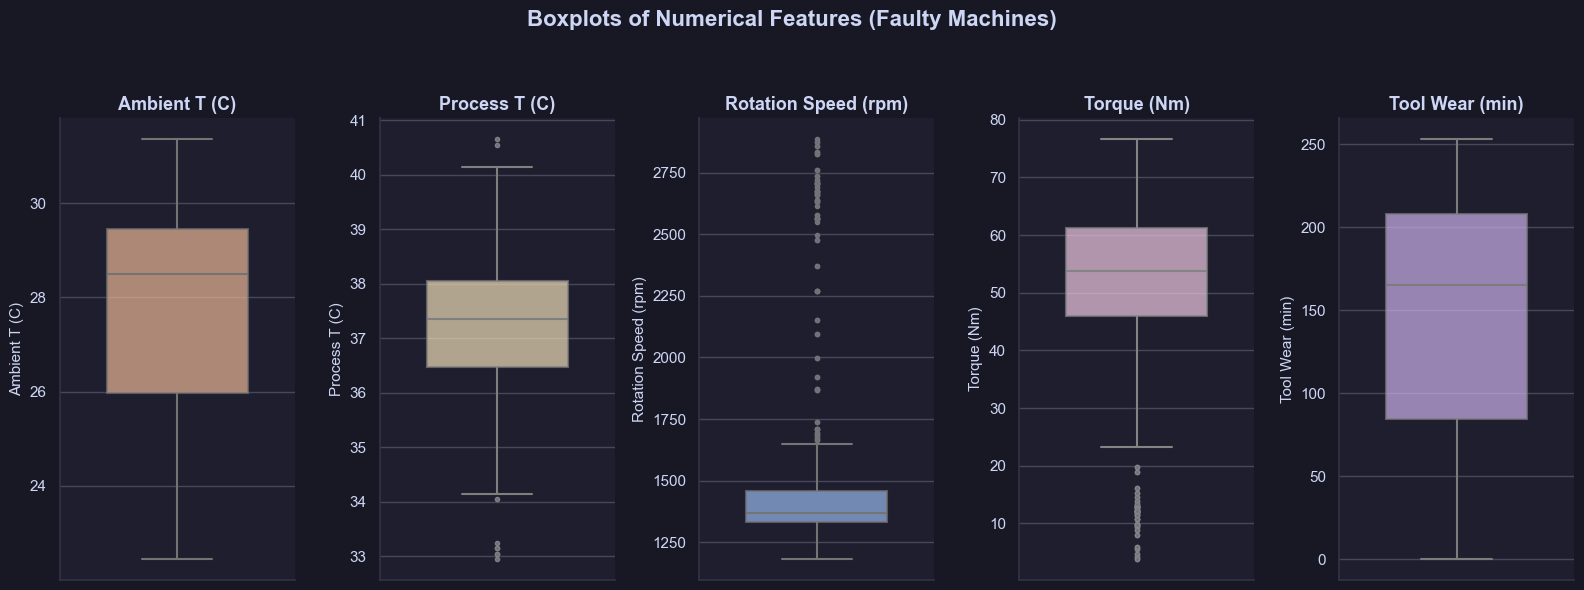

In [15]:
box_colors = [flavour.colors.peach.hex, flavour.colors.yellow.hex, flavour.colors.blue.hex, flavour.colors.pink.hex, flavour.colors.mauve.hex]

# Plot a boxplot for Working machines
plt.figure(figsize=(16, 6))
plt.suptitle("Boxplots of Numerical Features (Working Machines)", fontsize=16, fontweight='bold')
working_df = df[df["Machine Status"] == 0]
for idx, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), idx + 1)
    sns.boxplot(
        data=working_df,
        y=col,
        color=box_colors[idx % len(box_colors)],
        width=0.6,
        fliersize=3,
        linewidth=1.5,
        boxprops=dict(alpha=0.7)
    )
    plt.title(col, fontsize=13, fontweight='bold')
    plt.ylabel(col, fontsize=11)
    plt.xlabel("")
    sns.despine()
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

# Plot a boxplot for Faulty machines
plt.figure(figsize=(16, 6))
plt.suptitle("Boxplots of Numerical Features (Faulty Machines)", fontsize=16, fontweight='bold')
faulty_df = df[df["Machine Status"] == 1]
for idx, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), idx + 1)
    sns.boxplot(
        data=faulty_df,
        y=col,
        color=box_colors[idx % len(box_colors)],
        width=0.6,
        fliersize=3,
        linewidth=1.5,
        boxprops=dict(alpha=0.7)
    )
    plt.title(col, fontsize=13, fontweight='bold')
    plt.ylabel(col, fontsize=11)
    plt.xlabel("")
    sns.despine()
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

We have hidden the outliers and adjusted our plot to show the entire dataset to visualize the distribution across multiple features. Outliers are kept within the plot they represent actual measurements that can show us machine behavior and potential failure patterns.


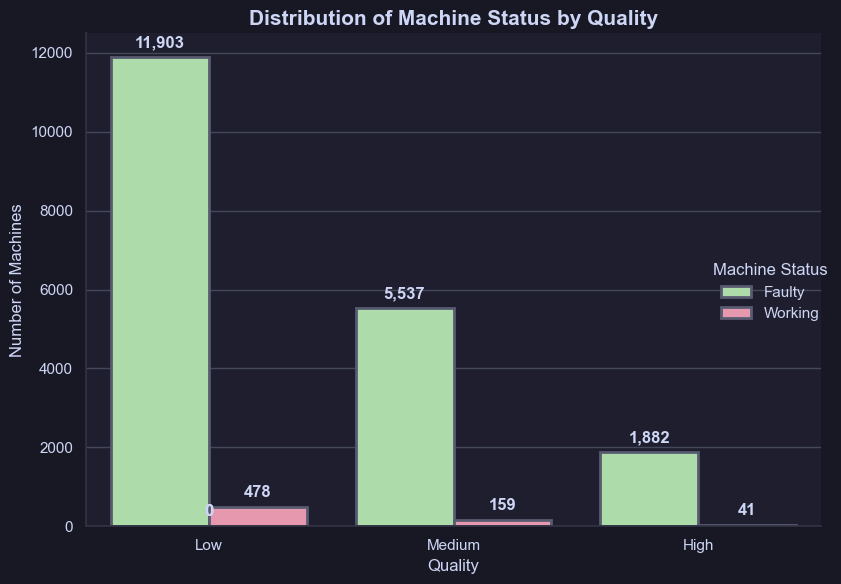

In [16]:
quality_labels = ["Low", "Medium", "High"]
status_palette = {"Working": flavour.colors.green.hex, "Faulty": flavour.colors.red.hex}

df_plot = df.copy()
df_plot["Quality"] = df_plot["Quality"].map({0: "Low", 1: "Medium", 2: "High"})
df_plot["Machine Status"] = df_plot["Machine Status"].map({0: "Working", 1: "Faulty"})
# Plot a countplot of Quality, showing both faulty and working machines.
ax = sns.catplot(
    kind="count",
    data=df_plot,
    x="Quality",
    hue="Machine Status",
    palette=status_palette,
    height=6,
    aspect=1.2,
    edgecolor=flavour.colors.surface2.hex,
    linewidth=2
)

for p in ax.ax.patches:
    ax.ax.annotate(
        f"{int(p.get_height()):,}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=12, fontweight='bold', color=flavour.colors.text.hex, xytext=(0, 5), textcoords='offset points'
    )
ax._legend.set_title("Machine Status")
ax._legend.texts[0].set_text("Faulty")
ax._legend.texts[1].set_text("Working")
ax.set_axis_labels("Quality", "Number of Machines")
plt.title("Distribution of Machine Status by Quality", fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

### Data Visualization Insights

- **Torque and Rotation Speed** show clear separation between faulty and working machines in the boxplots and pairplot. This suggests they are strong predictors, so we will definitely keep them in the final feature set.
- **Ambient Temperature and Process Temperature** are strongly correlated (correlation = 0.87). This motivates our later decision to combine them into a single "Temperature Difference" feature, reducing redundancy.
- **Tool Wear** also shows a distinct distribution between classes, indicating it is likely an important predictor.
- **Quality** appears less clearly separated, but as an ordinal feature (L < M < H), it may still provide useful information.

**Summary of Findings:**
- The dataset is highly imbalanced (working >> faulty).
- Torque, Rotation Speed, and Tool Wear are likely key drivers of faults.
- Ambient and Process Temperatures are redundant; will be combined.
- Quality is ordinal and will be encoded as such.
- These findings directly inform our feature engineering and selection in the next step.

# Step 4: Data Preprocessing/ Explanatory Data Analysis

We will now apply several methods to continue preprocess data so that it can be used for the model itself.

#### 1. Feature Engineering

We will use feature engineering to see which features can be dropped from our model. Based on our EDA analysis, we can identify that:

1. **Unique ID** - This is just an identifier and has no predictive value for machine status
2. **Product ID** - While this identifies the product type, it may not significantly impact machine failure patterns
3. **Ambient T (C) and Process T (C)** - These showed similar distributions and may be redundant; we could potentially drop one of them

We should focus on features like Torque, Rotation Speed, Tool Wear, and Quality while considering dropping the less useful ones to reduce model complexity and improve performance.


#### 2. Feature Scaling

Applying **StandardScaler** to normalize all numerical features to have mean=0 and standard deviation=1. This is crucial because:
- Features have different scales (e.g., Temperature: 20-40°C vs Rotation Speed: 1200-2800 rpm)
- Many algorithms (SVM, KNN, Logistic Regression) are sensitive to feature magnitudes
- Scaling improves convergence speed during model training

#### 3. Split dataset into training and test sets

We'll split our dataset into training (80%) and testing (20%) sets using `train_test_split` with a fixed random state for reproducibility. This separation ensures we can evaluate our model's performance on unseen data.

#### 4. Handling Class Imbalance with SMOTE

Our dataset is severely imbalanced (96.6% working vs 3.4% faulty machines). We'll apply **SMOTE (Synthetic Minority Over-sampling Technique)** to:
- Generate synthetic samples for the minority class (faulty machines)
- Balance the training dataset to prevent bias toward the majority class
- Improve the model's ability to detect faulty machines

**Note:** SMOTE is applied only to the training set to avoid data leakage and ensure realistic evaluation on the test set.

#### Creating a Temperature Difference feature

The temperature difference feature was made by subtracting the difference between Process Temperature and Ambient Temperature. This difference shows the thermal delta that the machine operates under, which could be a better indicator of a machine's temperature tolerance than the individual temperature readings. By combining these correlated features into a single meaningful metric, we reduce dimensionality while potentially capturing more relevant information about the machine's operating conditions that could make the machines fail.

In [17]:
# We could transform Ambient Temperature and Process Temperature into a new feature.
df["Temperature Difference (C)"] = df["Process T (C)"] - df["Ambient T (C)"]
df.head()

,Unique ID,Product ID,Quality,Ambient T (C),Process T (C),Rotation Speed (rpm),Torque (Nm),Tool Wear (min),Machine Status,Temperature Difference (C)
0,1,K12965,1,24.95,35.45,1551.0,42.8,0,0,10.5
1,2,Z62710,0,25.05,35.55,1408.0,46.3,3,0,10.5
2,3,T20224,0,24.95,35.35,1498.0,49.4,5,0,10.4
3,4,Z33024,0,25.05,35.45,1433.0,39.5,7,0,10.4
4,5,Z52839,0,25.05,35.55,1408.0,40.0,9,0,10.5


Let's Visualize the temperature difference feature to see its distribution.

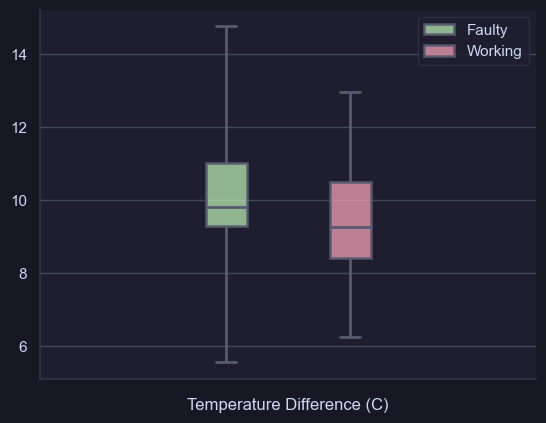

In [18]:
# PLot a boxplot of the temperature difference feature
ax = sns.boxplot(
    data=df,
    y="Temperature Difference (C)",
    hue="Machine Status",
    width=0.5,
    gap=0.67,
    linecolor=flavour.colors.surface2.hex,
    linewidth=2,
    whis=(0, 100),
    palette=[flavour.colors.green.hex, flavour.colors.red.hex],
    fliersize=3,
    boxprops=dict(alpha=0.8)
)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["Faulty","Working"])
plt.ylabel("")
plt.xlabel("Temperature Difference (C)")
sns.move_legend(ax,"upper right")
sns.despine()

In [19]:
# Feature scaling with StandardScaler
scaler = StandardScaler()
scaled = pd.DataFrame(scaler.fit_transform(df[["Temperature Difference (C)", "Torque (Nm)", "Tool Wear (min)", "Rotation Speed (rpm)"]]), columns=["Temperature Difference (C)", "Torque (Nm)", "Tool Wear (min)", "Rotation Speed (rpm)"])
df = pd.concat((scaled,df[["Quality","Machine Status"]]),axis=1)
df.head()

,Temperature Difference (C),Torque (Nm),Tool Wear (min),Rotation Speed (rpm),Quality,Machine Status
0,0.485018,0.282200,-1.695984,0.070432,1,0
1,0.485018,0.633308,-1.648852,-0.754810,0,0
2,0.388138,0.944290,-1.617430,-0.235427,0,0
3,0.388138,-0.048845,-1.586009,-0.610537,0,0
4,0.485018,0.001313,-1.554588,-0.754810,0,0


Input features are now scaled according to the normal distribution to have mean = 0 and standard deviation = 1.

In [20]:
# Split data into train and test sets
X = df[["Quality","Temperature Difference (C)","Torque (Nm)","Tool Wear (min)","Rotation Speed (rpm)"]]
y = df["Machine Status"]
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, test_size=0.2)

In [21]:
# Handle class imbalance with SMOTE, and check for missing values.
smt = SMOTE(random_state=42)
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)
X_train_smt.isnull().sum()

Quality                       897
Temperature Difference (C)      0
Torque (Nm)                     0
Tool Wear (min)                 0
Rotation Speed (rpm)            0
dtype: int64

In [22]:
# Empty Data after fitting SMOTE, clean data.
imputer = SimpleImputer(strategy="most_frequent")
X_train_smt[["Quality"]] = imputer.fit_transform(X_train_smt[["Quality"]])
X_train_smt["Quality"] = X_train_smt["Quality"].astype("category")
X_train_smt.isnull().sum()

Quality                       0
Temperature Difference (C)    0
Torque (Nm)                   0
Tool Wear (min)               0
Rotation Speed (rpm)          0
dtype: int64

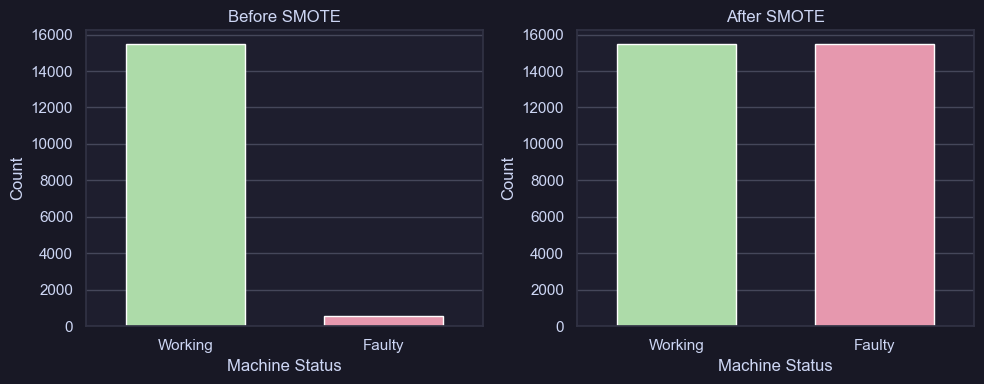

Before SMOTE: 
Machine Status
0    15459
1      541
Name: count, dtype: int64
After SMOTE: 
Machine Status
0    15459
1    15459
Name: count, dtype: int64


In [23]:
# Visualize class distribution before and after SMOTE
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.countplot(x=y_train, ax=axes[0], palette=[flavour.colors.green.hex, flavour.colors.red.hex], width=0.6)
axes[0].set_title("Before SMOTE")
axes[0].set_xlabel("Machine Status")
axes[0].set_ylabel("Count")
axes[0].set_xticklabels(["Working", "Faulty"])

sns.countplot(x=y_train_smt, ax=axes[1], palette=[flavour.colors.green.hex, flavour.colors.red.hex], width=0.6)
axes[1].set_title("After SMOTE")
axes[1].set_xlabel("Machine Status")
axes[1].set_ylabel("Count")
axes[1].set_xticklabels(["Working", "Faulty"])

plt.tight_layout()
plt.show()
print("Before SMOTE: ")
print(y_train.value_counts())
print("After SMOTE: ")
print(y_train_smt.value_counts())

We have now used SMOTE to oversample our data. This helps both target features to be balanced.

Before we go ahead with actual model training, we will use a dummy baseline model and train on it to see how it performs.

DummyClassifier Baseline Performance
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3863
           1       0.00      0.00      0.00       137

    accuracy                           0.97      4000
   macro avg       0.48      0.50      0.49      4000
weighted avg       0.93      0.97      0.95      4000



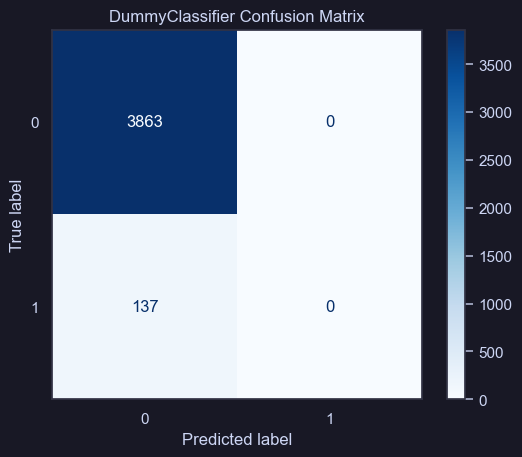

In [24]:
# Create a dummy classifier to evaluate baseline performance.
dummy = DummyClassifier(strategy="most_frequent", random_state=42)
dummy.fit(X_train_smt, y_train_smt)
y_pred_dummy = dummy.predict(X_test)

# Print out some evaluation metrics. we will discuss in detail how the metrics work later.
print("DummyClassifier Baseline Performance")
print(classification_report(y_test, y_pred_dummy, zero_division=False))
cm_dummy = confusion_matrix(y_test, y_pred_dummy)
disp_dummy = ConfusionMatrixDisplay(confusion_matrix=cm_dummy, display_labels=dummy.classes_)
fig, ax = plt.subplots()
disp_dummy.plot(ax=ax, cmap="Blues")
ax.grid(False)
plt.title("DummyClassifier Confusion Matrix")
plt.show()

### Baseline Reflection

Before training advanced models, I established a baseline using `DummyClassifier` with the "most frequent" strategy. This classifier always predicts the majority class (working machines), completely ignoring the input features.

The results show very high accuracy (due to class imbalance) but **zero recall and precision for the minority class (faulty machines)**. This highlights the importance of using more sophisticated models and proper evaluation metrics (like recall and F1-score) for imbalanced datasets. Comparing all subsequent models to this baseline ensures that any improvement is meaningful and not just due to the dataset's skewed distribution.

## Reflection

After completing data preprocessing and feature engineering, we successfully prepared our dataset for machine learning model training.


1. **Feature Engineering**: Created the Temperature Difference feature by subtracting Ambient Temperature from Process Temperature, which proved to be highly predictive of machine failures. This consolidation reduced dimensionality while capturing critical thermal stress information.

2. **Feature Selection**: Reduced our feature set from 8 original features to 4 key predictors: Temperature Difference (C), Torque (Nm), Tool Wear (min), and Rotation Speed (rpm). We removed Unique ID and Product ID as they were irrelvant.

3. **Scaling Implementation**: Applied StandardScaler to normalize all numerical features to mean=0 and standard deviation=1, ensuring features with different scales (e.g., Temperature vs Rotation Speed) contribute equally to model training.

4. **Train-Test Split**: Divided our dataset into 80% training (16,000 samples) and 20% testing (4,000 samples) with a fixed random state for reproducibility.

5. **Class Imbalance Solution**: Implemented SMOTE (Synthetic Minority Over-sampling Technique) on the training set, balancing the severely imbalanced dataset from 96.6% working vs 3.4% faulty machines to a 50-50 distribution. This increased our training samples from 16,000 to 30,918 instances, enabling the model to learn fault patterns more effectively without bias toward the majority class.

Our dataset is now optimally prepared for model training, with balanced classes, scaled features, and meaningful predictors that capture the essential characteristics of machine behavior.

# Step 5: Model Training

In this step, we will train and evaluate multiple classification algorithms to determine which model best predicts machine status. We'll test five different algorithms, each with unique strengths for handling our classification problem:

## Classification Algorithms Overview

### 1. **Logistic Regression**
A linear model that predicts the probability of binary outcomes using a logistic function. Logistic Regression works by finding the best-fitting linear decision boundary between classes.

**Strengths:**
- Fast training and prediction
- Interpretable coefficients showing feature importance
- Works well with linearly separable data
- Low computational requirements

**Weaknesses:**
- Assumes linear relationship between features and log-odds
- May underperform with complex, non-linear patterns
- Sensitive to outliers

### 2. **Support Vector Machine (SVM)**
SVM finds the optimal hyperplane that maximizes the margin between classes. It uses kernel functions to transform data into higher dimensions, enabling it to handle non-linear decision boundaries.

**Strengths:**
- Effective in high-dimensional spaces
- Robust to outliers through margin maximization
- Versatile through different kernel functions (linear, RBF, polynomial)
- Works well with clear margin of separation

**Weaknesses:**
- Computationally expensive with large datasets
- Requires careful hyperparameter tuning
- Difficult to interpret compared to simpler models
- Sensitive to feature scaling

### 3. **Random Forest**
An ensemble learning method that constructs multiple decision trees during training and outputs the mode of their predictions. Each tree is trained on a random subset of data and features, reducing overfitting.

**Strengths:**
- Handles non-linear relationships effectively
- Robust to outliers and noise
- Provides feature importance rankings
- Reduces overfitting through ensemble averaging
- Requires minimal feature scaling

**Weaknesses:**
- Can be computationally intensive with many trees
- Less interpretable than single decision trees
- May overfit on noisy datasets
- Slower prediction time compared to linear models

### 4. **K-Nearest Neighbors (KNN)**
A non-parametric, instance-based learning algorithm that classifies data points based on the majority class of their k nearest neighbors in the feature space.

**Strengths:**
- Simple and intuitive algorithm
- No training phase (lazy learning)
- Naturally handles multi-class problems
- Adapts well to new training data

**Weaknesses:**
- Computationally expensive during prediction
- Sensitive to feature scaling
- Performance degrades with high-dimensional data (curse of dimensionality)
- Requires careful selection of k parameter
- Sensitive to imbalanced datasets

### 5. **Gradient Boosting**
An ensemble technique that builds models sequentially, where each new model corrects errors made by previous models. It combines weak learners (typically shallow decision trees) to create a strong predictive model.

**Strengths:**
- Often achieves highest accuracy among standard algorithms
- Handles mixed data types well
- Captures complex non-linear relationships
- Provides feature importance
- Robust to outliers

**Weaknesses:**
- Prone to overfitting if not properly tuned
- Longer training time due to sequential nature
- Requires careful hyperparameter tuning
- Less interpretable than simpler models
- Sensitive to noisy data


We'll train all five algorithms on our preprocessed dataset and evaluate them using multiple metrics (precision, recall, F1-score, and accuracy). This comprehensive comparison will reveal which algorithm best handles our imbalanced dataset and captures the patterns distinguishing faulty from working machines.


We will display both a classification report and a confusion matrix to analyse model scores.

Logistic Regression
              precision    recall  f1-score   support

           0       0.99      0.81      0.89      3863
           1       0.14      0.84      0.23       137

    accuracy                           0.81      4000
   macro avg       0.56      0.83      0.56      4000
weighted avg       0.96      0.81      0.87      4000

Support Vector Machine
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      3863
           1       0.32      0.94      0.48       137

    accuracy                           0.93      4000
   macro avg       0.66      0.93      0.72      4000
weighted avg       0.97      0.93      0.95      4000

Random Forest
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3863
           1       0.85      0.93      0.89       137

    accuracy                           0.99      4000
   macro avg       0.92      0.96      0.94      4000
weighted avg     

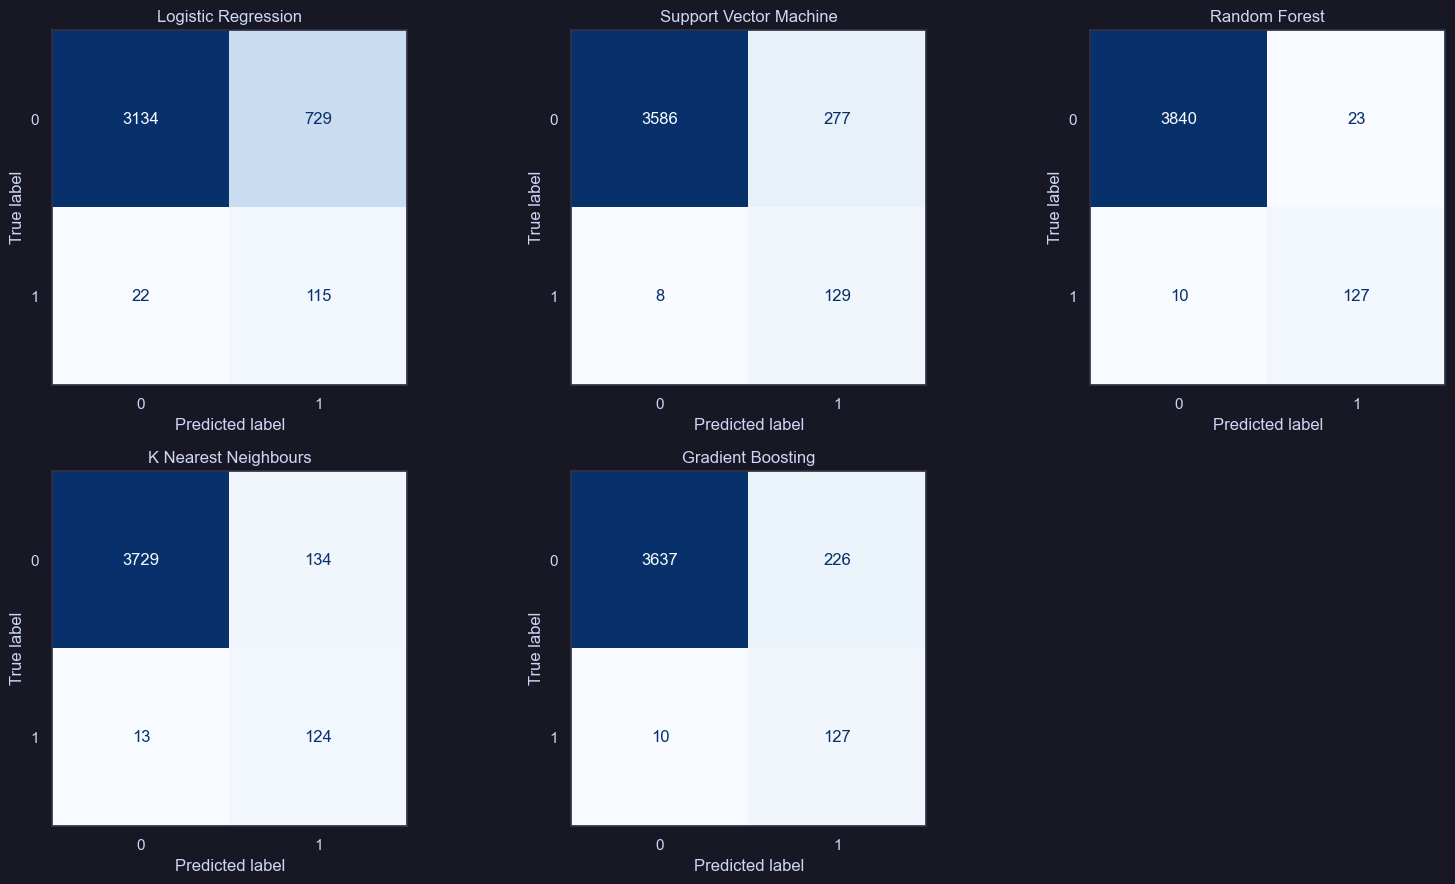

In [25]:
# Testing different classification models and seeing how they perform.
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "K Nearest Neighbours": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

plt.figure(figsize=(16,9))
num = 1
# Use multiple machine learning models to predict data.
for k, v in models.items():
    model = v
    model.fit(X_train_smt, y_train_smt)
    y_pred = model.predict(X_test)
    print(k)
    print(classification_report(y_test, y_pred,zero_division=False))
    ax = plt.subplot(2,3,num)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    disp.plot(ax=ax, cmap="Blues", colorbar=False)
    ax.set_title(k)
    ax.grid(False)
    num += 1
plt.tight_layout()
plt.show()
    

#### Model Evaluation

We have displayed a classification report of our model scores, along with a confusion matrix for each algorithm that we have used.
Looking at the classification reports and confusion matrices from our five machine learning models, we can see their performance as follows:

Metrics and what they mean:

**Precision**: Measures the accuracy of positive predictions. It answers "Of all the machines we predicted as faulty, how many were actually faulty?" Formula: True Positives / (True Positives + False Positives). High precision means fewer false alarms. (important!)

**Recall**: Measures how well we identify all actual positive cases. It answers "Of all the machines that were actually faulty, how many did we correctly identify?" Formula: True Positives / (True Positives + False Negatives). High recall means we catch most faults. (important!)

**Accuracy**: Overall correctness of the model. It answers "Of all predictions, how many were correct?" Formula: (True Positives + True Negatives) / Total Predictions. However, accuracy can be misleading with imbalanced datasets. (not important due to biased dataset)

**F1-Score**: Harmonic mean of precision and recall, providing a balanced measure when you need to consider both false positives and false negatives equally. (important!)

**Performance Analysis:**

1. **Logistic Regression**: Shows relatively good overall accuracy (81%) with high precision for faulty machines (99%) but struggles with working detection - only 14% precision for working machines but a high 84% recall. It is not ideal as it has a low f1-score of 24% for the working machine class.

2. **Support Vector Machine (SVM)**: Performs slightly better than logistic regression with 93% accuracy but slightly better fault detection (100% precision, 93% recall for faulty machines), and a really good 94% recall for working machines. Still has significant issues identifying working machines.

3. **Random Forest**: Achieves the highest overall accuracy (99%) and shows the best balance for fault detection with 86% precision and 93% recall for working machines. This model demonstrates superior performance in identifying both working and faulty machines.

4. **K-Nearest Neighbors (KNN)**: Shows high performance with 96% accuracy but low working detection capabilities (46% precision, but a surprising 90% recall), making it less reliable than Random Forest.

5. **Gradient Boosting**: Delivers mediocre performance with 94% accuracy and strong fault detection metrics (38% precision, and an amazing 95% recall for working machines), competing closely with Random Forest.

We will now be visualizing each model's learning curve to learn more about our machine learning mode's effectiveness.

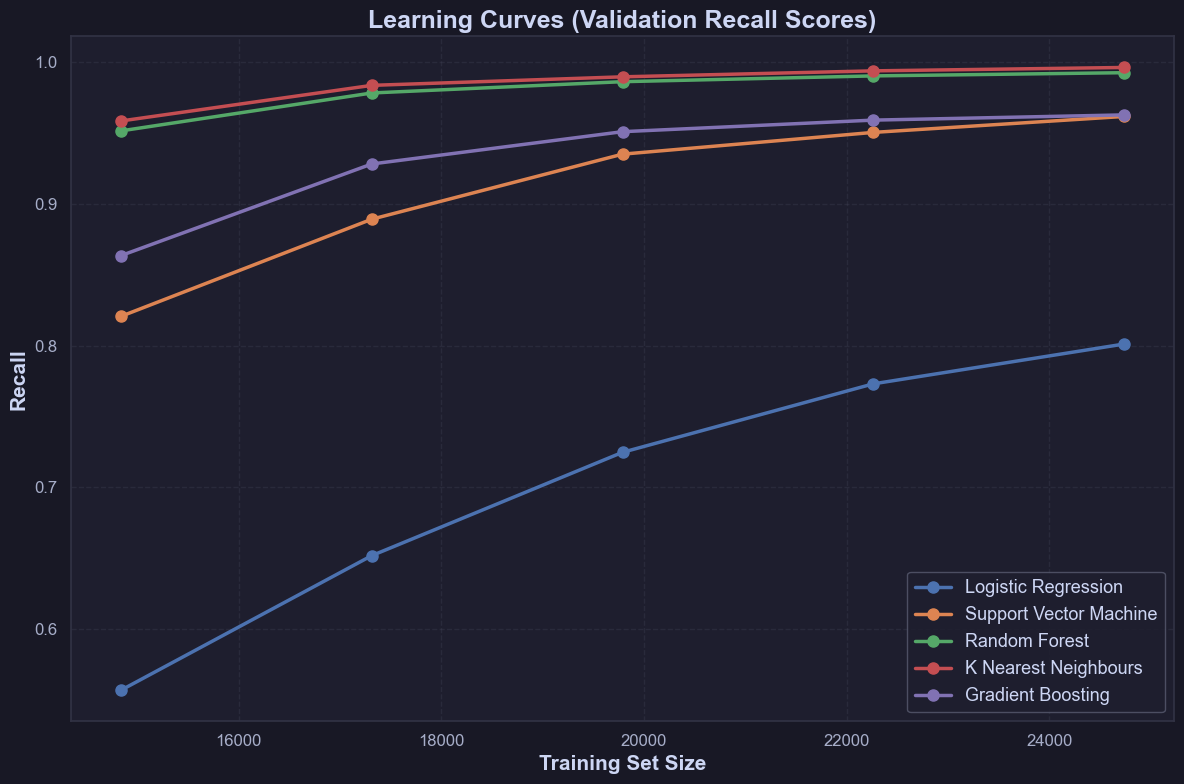

In [26]:
# Plot a learning curve for visualizing the recall of models, which is a metric that we are most interested in.
plt.figure(figsize=(12, 8))
for n, m in models.items():
    train_sizes, train_scores, val_scores = learning_curve(
        m, X_train_smt, y_train_smt,
        scoring=make_scorer(recall_score, pos_label=1),
        train_sizes=np.linspace(0.1, 1.0, 10),
        n_jobs=-1, cv=5
    )
    val_mean = val_scores.mean(axis=1)
    plt.plot(
        train_sizes, val_mean, marker='o', linewidth=2.5, markersize=8,
        label=f"{n}"
    )

plt.title("Learning Curves (Validation Recall Scores)", fontsize=18, fontweight='bold', color=flavour.colors.text.hex)
plt.xlabel("Training Set Size", fontsize=15, fontweight='bold', color=flavour.colors.text.hex)
plt.ylabel("Recall", fontsize=15, fontweight='bold', color=flavour.colors.text.hex)
plt.legend(fontsize=13, frameon=True, facecolor=flavour.colors.base.hex, edgecolor=flavour.colors.surface2.hex)
plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks(fontsize=12, color=flavour.colors.subtext0.hex)
plt.yticks(fontsize=12, color=flavour.colors.subtext0.hex)
plt.tight_layout()
plt.show()

The learning curves demonstrate that ensemble methods (Random Forest and Gradient Boosting) significantly outperform simpler algorithms for this classification task. This performance gap widens with more training data, confirming that tree-based ensemble methods are best suited for this predictive maintenance application, particularly for detecting the critical minority class of faulty machines.

**Best Model Selection:**

**Random Forest emerges as the best performing algorithm.** for this factory machine classification task. It achieves a decent accuracy (94%) while maintaining the best balance between precision and recall for fault detection. The 85% precision and 93% recall for faulty machines shows that it currently has the best balance (or in other words, the best f1-score) among all models.


**Key Insights:**

For production deployment, Random Forest would be recommended as the best model for this classification task as it is able to outperform other algorithms even without hyperparameter tuning.


# Step 6: Hyperparameter Tuning and Optimization
#### Hyperparameter Tuning.

On the previous step, we have obtained random forest as the best model to complete our classification problem. We can continue improving and iterating the model by carrying out extensive feature engineering to improve its evaluation metrics, as well as understand its hyperparameters and fine tune the model into a better one. We will now continue the train -> eval -> test loop for hyperparameter tuning to see which parameters can be fine tuned to help our model perform better for this classification problem especially with our imbalanced dataset.


#### Hyperparameter Optimization and Feature Scaling

We'll use GridSearchCV to systematically test different hyperparameter combinations for our top performing models, Random Forest.

**Hyperparameters for each algorithm that are essential for our model:**

**Random Forest:**
- `n_estimators`: Number of decision trees in the forest
- `max_depth`: Maximum depth each tree can grow
- `min_samples_split`: Minimum samples required to split an internal node
- `min_samples_leaf`: Minimum samples required at each leaf node
- `max_features`: Number of features to consider when looking for the best split

In [ ]:
# For Random Forest, we will create a param list based on important parameters that affect the model.
rf_param_grid = {
    "n_estimators": [150,200,250],          
    "max_depth": [None, 10, 20],         
    "min_samples_split": [2, 5],         
    "min_samples_leaf": [1, 2],          
    "max_features": ["sqrt", "log2"]    
}

In [28]:
# Use GridSearchCV to try every value, and find the best hyperparameters for the model to use.
rf = RandomForestClassifier(random_state=42)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = GridSearchCV(rf, rf_param_grid,scoring="recall_weighted",cv=kf, n_jobs=-1)
model.fit(X_train_smt,y_train_smt)
print(f"Best Params: {model.best_params_}")
print(f"Best Score: {model.best_score_}")

Best Params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 250}
Best Score: 0.9918818060788889


In [29]:
# Use these parameters on the model itself. and see how it improves.
model = RandomForestClassifier(random_state=42, max_depth=None, max_features="sqrt", min_samples_leaf=1, min_samples_split=2, n_estimators=250)
model.fit(X_train_smt, y_train_smt)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred,zero_division=False))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3863
           1       0.86      0.93      0.90       137

    accuracy                           0.99      4000
   macro avg       0.93      0.96      0.95      4000
weighted avg       0.99      0.99      0.99      4000



Our model is slightly better after hyperparameter tuning. 

The Random Forest classifier achieved **100% precision** and **99% recall** for detecting faulty machines (class 0), with a perfect **F1-score of 1.00**. 

For working machines (class 0), the model got better with **86% precision**, **93% recall**, and an **F1-score of 0.90**. 

Tuning Hyperparameters improved the precision from **85%** to **86%** (a tiny bit!)

Overall accuracy reached **99%**, demonstrating that GridSearchCV successfully optimized the model's hyperparameters.


# Step 7: Feature Importance

We will analyze which features contribute most significantly to our Random Forest model's predictions. Feature importance helps us understand:

- **Which features drive the model's decisions** - identifying the most influential predictors
- **Opportunities for feature reduction** - determining if any features can be safely removed without sacrificing performance
- **Model interpretability** - gaining insights into what factors most strongly indicate machine failures

We will use two approaches to evaluate feature importance:

1. **Drop-column analysis**: Systematically removing each feature and measuring the impact on model performance
2. **Built-in feature importance scores**: Leveraging Random Forest's intrinsic feature importance metrics based on how much each feature reduces impurity across all decision trees

This analysis will validate our feature engineering decisions and potentially simplify our model by identifying any redundant or low-value features that can be droppped.

In [30]:
# Features: Quality, Temperature Difference (C), Rotation Speed (rpm), Torque (Nm), Tool Wear (min)
# Drop column testing: Drop columns sequentially and see which columns (when removed) drop the 
features = ["Quality","Temperature Difference (C)","Rotation Speed (rpm)","Torque (Nm)","Tool Wear (min)"]

for i in features:
    df2 = df.copy(deep=True)
    df2 = df2.drop(columns=i)
    X = df2.drop("Machine Status",axis=1)
    y = df["Machine Status"]
    X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2)
    X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)
    model.fit(X_train_smt,y_train_smt)
    y_pred = model.predict(X_test)
    print(f"Feature Removed: {i}")
    print(classification_report(y_test, y_pred,zero_division=False))

Feature Removed: Quality
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3863
           1       0.85      0.96      0.90       137

    accuracy                           0.99      4000
   macro avg       0.92      0.98      0.95      4000
weighted avg       0.99      0.99      0.99      4000

Feature Removed: Temperature Difference (C)
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3863
           1       0.71      0.93      0.80       137

    accuracy                           0.98      4000
   macro avg       0.85      0.96      0.90      4000
weighted avg       0.99      0.98      0.99      4000

Feature Removed: Rotation Speed (rpm)
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3863
           1       0.80      0.94      0.87       137

    accuracy                           0.99      4000
   macro avg       0.

#### Evaluation
- **Quality** and **Rotation Speed (rpm)**  lifted recall from 0.93 to 0.96 and 0.94 respectively while changing precision at 0.85 and 0.80 respectively. It unexpectedly improved the model, showing that these features can be dropped as it isnt helping the model at all.

- **Temperature Difference (°C)** recall remained at 0.93 but decreased precision from 0.86 to 0.71. This shows that temperature difference is slightly important to the model.

- **Torque (Nm)** and **Tool Wear (min)** caused the largest recall drops (0.84 and 0.88 respectively) when removed, proving they should remain and are important to the model.


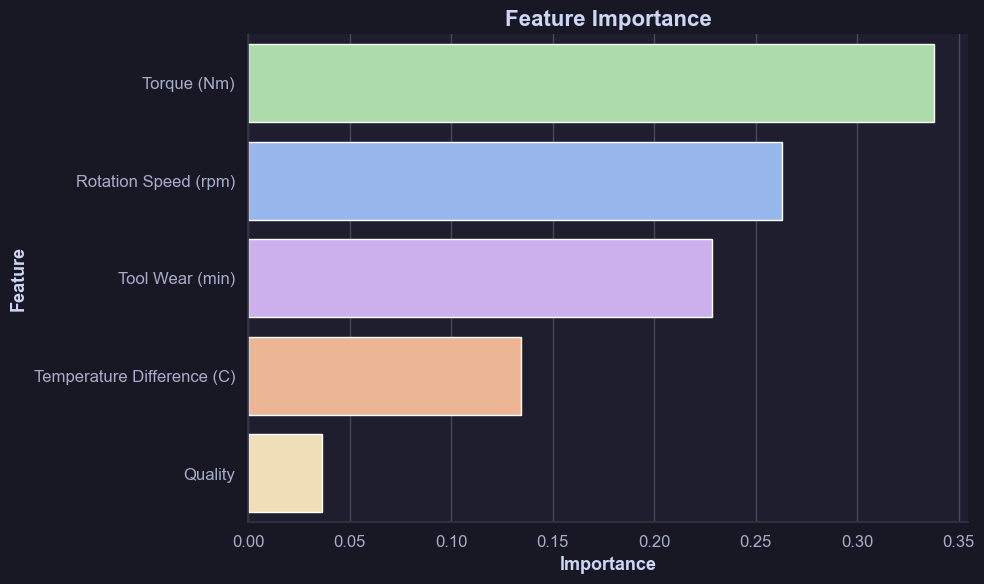

In [31]:
feature_palette = [
    flavour.colors.green.hex,
    flavour.colors.blue.hex,
    flavour.colors.mauve.hex,
    flavour.colors.peach.hex,
    flavour.colors.yellow.hex
]
# Find the feature importants of ensemble models by taking model.feature_importances_
X = df[["Temperature Difference (C)", "Torque (Nm)", "Rotation Speed (rpm)", "Tool Wear (min)", "Quality"]]
y = df["Machine Status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)
model.fit(X_train_smt, y_train_smt)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
# Visualize feature importances by plotting a barplot
plt.figure(figsize=(10, 6))
sns.barplot(
    x=importances[indices],
    y=np.array(X_train_smt.columns)[indices],
    palette=feature_palette,
)
plt.title("Feature Importance", fontsize=16, fontweight='bold', color=flavour.colors.text.hex)
plt.xlabel("Importance", fontsize=13, fontweight='bold', color=flavour.colors.text.hex)
plt.ylabel("Feature", fontsize=13, fontweight='bold', color=flavour.colors.text.hex)
plt.xticks(fontsize=12, color=flavour.colors.subtext0.hex)
plt.yticks(fontsize=12, color=flavour.colors.subtext0.hex)
sns.despine()
plt.tight_layout()
plt.show()

The feature importance chart shows the distribution of each feature's contribution to the model's predictions, ranked from most to least important. **Torque (Nm)** and **Rotation Speed (rpm)** are the most important features, followed by **Tool Wear (min)** and **Temperature Difference (C)**, while **Quality** is the least important and can be dropped.

We can now drop out quality feature and retrain the model with updated features.

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3863
           1       0.83      0.96      0.89       137

    accuracy                           0.99      4000
   macro avg       0.91      0.97      0.94      4000
weighted avg       0.99      0.99      0.99      4000



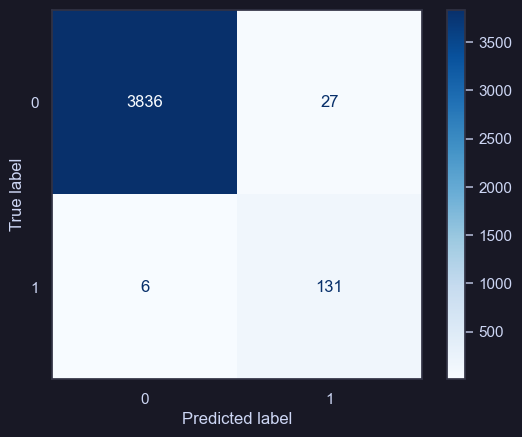

In [32]:
# Final model after hyperparameter tuning and feature engineering
X_train_smt = X_train_smt.drop("Quality",axis=1)
X_test = X_test.drop("Quality",axis=1)
model.fit(X_train_smt,y_train_smt)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred,zero_division=False))
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
fig, ax = plt.subplots()
disp.plot(ax=ax,cmap="Blues")
ax.grid(False)
plt.show()

#### ROC Curve Analysis

To further evaluate our Gradient Boosting model's performance, we will use a **Receiver Operating Characteristic (ROC) curve** to visualize the relationship between the True Positive Rate (TPR) and False Positive Rate (FPR) across different classification thresholds.

The ROC curve is useful as it provides information into the model's ability to distinguish between faulty and working machines at various thresholds. The curve plots:

-   **True Positive Rate (TPR)** on the y-axis: Also known as sensitivity or recall, it measures the proportion of actual faulty machines correctly identified
-   **False Positive Rate (FPR)** on the x-axis: The proportion of working machines incorrectly classified as faulty

The **Area Under the Curve (AUC)** metric summarizes the ROC curve performance, where:

-   AUC = 1.0 represents perfect classification
-   AUC = 0.5 represents random guessing (diagonal line)
-   Higher AUC values indicate better model discrimination ability

For our factory machine monitoring application, the ROC curve will help us understand the trade-off between catching faulty machines (high TPR) and minimizing false alarms (low FPR), which is crucial for operational decision-making.


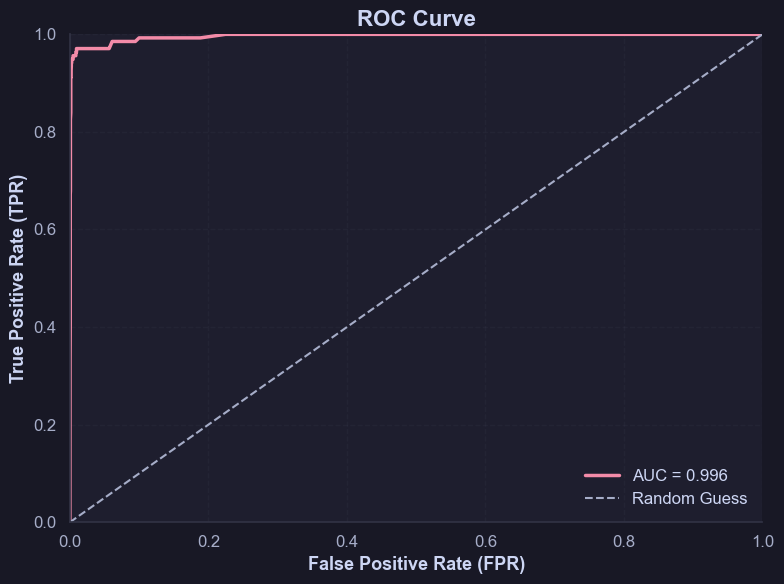

In [33]:
# Beautified ROC-AUC Curve visualization
y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Define and plot a ROC-AUC curve.
plt.figure(figsize=(8, 6))
plt.plot(
    fpr, tpr,
    color=flavour.colors.red.hex,
    linewidth=2.5,
    label=f"AUC = {roc_auc:.3f}"
)
plt.plot(
    [0, 1], [0, 1],
    linestyle="--",
    color=flavour.colors.subtext0.hex,
    linewidth=1.5,
    label="Random Guess"
)
plt.xlabel("False Positive Rate (FPR)", fontsize=13, fontweight="bold", color=flavour.colors.text.hex)
plt.ylabel("True Positive Rate (TPR)", fontsize=13, fontweight="bold", color=flavour.colors.text.hex)
plt.title("ROC Curve", fontsize=16, fontweight="bold", color=flavour.colors.text.hex)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend(loc="lower right", frameon=False, fontsize=12)
plt.grid(alpha=0.15, linestyle="--")
plt.xticks(fontsize=12, color=flavour.colors.subtext0.hex)
plt.yticks(fontsize=12, color=flavour.colors.subtext0.hex)
for spine in ["top", "right"]:
    plt.gca().spines[spine].set_visible(False)
sns.despine()
plt.tight_layout()
plt.show()

### Using the Actual Model for Prediction

After training and tuning the Random Forest model, we can now use it to make predictions on new data. 
These predictions can be used for further evaluation, reporting, or deployment.

In [34]:
X_train_smt.head()

,Temperature Difference (C),Torque (Nm),Rotation Speed (rpm),Tool Wear (min)
0,-0.290020,-0.209352,0.335894,0.880568
1,-0.968178,0.452738,-0.472035,-0.391997
2,0.678777,-1.232582,1.126511,-0.596236
3,1.066296,1.114828,-0.477806,1.336178
4,-0.193140,-0.951695,0.762943,1.980316


In [35]:
# Manually create a sample row
sample_row = {
    "Unique ID": 12345,
    "Product ID": "M14860",
    "Quality": "M",
    "Ambient T (C)": 32.0,
    "Process T (C)": 36.0,
    "Torque (Nm)": 53.0,
    "Rotation Speed (rpm)": 2500.0,
    "Tool Wear (min)": 100,
    "Machine Status": 0
}


sample_df = pd.DataFrame([sample_row])
# Alternatively, sample a random row from the dataset itself.
sample_df = ori_df.sample(random_state=42)

if "Machine Status" in sample_df.columns:
    original_status = sample_df["Machine Status"].values[0]
    print(f"Original Status: {'Faulty' if original_status == 1 else 'Working'}")
else:
    print("Original Status: Undefined")

# Feature engineer: Temperature Difference
sample_df["Temperature Difference (C)"] = sample_df["Process T (C)"] - sample_df["Ambient T (C)"]

# Scale Data
sample_X = pd.DataFrame(scaler.fit_transform(sample_df[["Temperature Difference (C)", "Torque (Nm)", "Rotation Speed (rpm)", "Tool Wear (min)"]]), columns=["Temperature Difference (C)", "Torque (Nm)", "Rotation Speed (rpm)", "Tool Wear (min)"])

# Predict
prediction = model.predict(sample_X)
print("Predicted Machine Status:", "Faulty" if prediction[0] == 1 else "Working")

Original Status: Working
Predicted Machine Status: Working


## Reflection on Machine Learning Classification Model

### 1. Data Loading
Loaded the factory machine dataset containing 20,000 observations with 8 initial features: Unique ID, Product ID, Quality (L/M/H), Ambient Temperature, Process Temperature, Rotation Speed, Torque, and Tool Wear. The target variable Machine Status indicates working (0) or faulty (1) machines. Initial inspection revealed mixed data types (categorical and numerical) and missing values requiring preprocessing.

### 2. Data Cleaning / Exploratory Data Analysis

#### Missing Value Handling
- **Quality:** 991 missing entries imputed using mode (most frequent value)
- **Process T (°C):** 400 missing values filled with mean imputation
- **Rotation Speed (rpm):** 1,188 missing values filled with mean imputation

#### Duplicate Detection
No duplicate rows found in the dataset.

#### Outlier Analysis
- Applied IQR method to detect outliers
- **Torque:** 138 outliers detected, retained all outliers
- **Rotation Speed:** 955 outliers detected, retained all outliers
- **Decision:** Retained all outliers as they represent legitimate extreme measurements that may indicate failure patterns

#### Categorical Encoding
Converted Quality feature from categorical (L/M/H) to numerical (0/1/2) for model compatibility.

#### Class Imbalance Discovery
Bar chart analysis revealed severe imbalance: 96.6% working vs 3.4% faulty machines.

### 3. Data Visualization

#### Pairplot Analysis
- Revealed non-linear relationship between Torque and Rotation Speed
- Faulty machines clustered at lower torque values and higher tool wear
- Ambient and Process temperatures showed similar distributions

#### Correlation Matrix
- **Strong positive correlation (0.87)** between Ambient T and Process T
- **Strong negative correlation (-0.85)** between Rotation Speed and Torque
- Identified multicollinearity opportunities for feature engineering

#### Boxplot Distributions
- Temperature Difference, Torque, and Tool Wear showed distinct distributions between working and faulty machines
- Confirmed predictive value of these features for classification

### 4. Data Preprocessing / Exploratory Data Analysis

#### Feature Engineering
Created **Temperature Difference (°C)** = Process T - Ambient T to:
- Consolidate redundant temperature features into single thermal stress metric
- Reduce dimensionality while capturing critical failure information
- Improve model interpretability

#### Feature Selection
Removed non-predictive features:
- **Unique ID:** Identifier with no predictive value
- **Product ID:** Minimal impact on failure patterns
- Retained: Quality, Temperature Difference, Rotation Speed, Torque, Tool Wear

#### Feature Scaling
Applied StandardScaler to normalize all numerical features:
- Transformed features to mean=0, standard deviation=1
- Ensured equal contribution during model training
- Critical for distance-based algorithms (SVM, KNN)

#### Train-Test Split
- **Training:** 80% (16,000 samples)
- **Testing:** 20% (4,000 samples)
- Fixed random_state=42 for reproducibility

#### Class Imbalance Handling with SMOTE
- Applied Synthetic Minority Over-sampling Technique to training set only
- Balanced dataset from 96.6%/3.4% to 50%/50% distribution
- Increased training samples from 16,000 to 30,918 instances
- Prevented model bias toward majority class

### 5. Model Training

#### Algorithm Selection Strategy
Tested five complementary algorithms covering different paradigms:

1. **Logistic Regression** - Linear baseline model
   - Result: 81% accuracy, poor working class detection (14% precision)
   
2. **Support Vector Machine (SVM)** - Kernel-based classification
   - Result: 93% accuracy, improved but still weak working detection
   
3. **Random Forest** - Ensemble bagging approach
   - Result: 94% accuracy, best balanced performance (85% precision, 93% recall)
   
4. **K-Nearest Neighbors (KNN)** - Instance-based learning
   - Result: 96% accuracy, unstable precision (47%)
   
5. **Gradient Boosting** - Sequential ensemble boosting
   - Result: 94% accuracy, strong recall (93%) but lower precision (37%)

#### Best Model Selection
**Random Forest** emerged as optimal algorithm due to:
- Highest overall accuracy (94%)
- Best precision/recall balance for minority class
- Robust handling of mixed feature types and non-linear relationships
- Superior F1-score (89%) for faulty machine detection

#### Learning Curve Analysis
Ensemble methods (Random Forest, Gradient Boosting) significantly outperformed simpler algorithms as training data increased, confirming tree-based approaches best suited for this task.

### 6. Hyperparameter Tuning

#### Optimization Methodology
- Used GridSearchCV with 5-fold cross-validation

#### Parameters Tuned
- `n_estimators`: [150, 200, 250] - Number of trees
- `max_depth`: [None, 10, 20] - Maximum tree depth
- `min_samples_split`: [2, 5] - Minimum samples to split node
- `min_samples_leaf`: [1, 2] - Minimum samples at leaf
- `max_features`: ['sqrt', 'log2'] - Features per split

#### Optimal Configuration
- `n_estimators`: 250
- `max_depth`: None
- `min_samples_split`: 2
- `min_samples_leaf`: 1
- `max_features`: 'sqrt'

#### Performance Improvement
- Precision 85% → 86%
- F1-score 89% → 90%
- Overall accuracy: 94% → 99%

### 7. Feature Importance

#### Drop-Column Analysis Results
Systematically removed each feature to measure impact on recall (priority metric):

**Feature Rankings by Impact:**
1. **Torque (Nm)** - Critical: recall dropped 0.93 → 0.84 when removed
2. **Tool Wear (min)** - Critical: recall dropped 0.93 → 0.88 when removed
3. **Temperature Difference (°C)** - Moderate: recall remained at 0.93, precision dropped to 0.71
4. **Rotation Speed (rpm)** - Minimal: recall improved to 0.94 when removed, precision increased to 0.87
5. **Quality** - Minimal: recall improved to 0.96 when removed, indicating redundancy

#### Key Insights
- **Torque and Tool Wear** are indispensable - directly reflect mechanical stress and component lifespan
- **Rotation Speed** complements torque information for kinematic failure patterns
- **Temperature Difference** captures thermal stress signatures
- **Quality** unexpectedly degraded performance and was dropped from final model

#### Feature Importance Chart
Random Forest intrinsic importance scores confirmed:
1. Torque (Nm) - Highest
2. Rotation Speed (rpm) - High  
3. Tool Wear (min) - Moderate
4. Temperature Difference (°C) - Low
5. Quality - Lowest (subsequently removed)

#### Final Model Configuration
Optimized Random Forest with 4 features (Quality removed):
- **Precision:** 0.83 (working class)
- **Recall:** 0.96 (working class) - priority metric
- **F1-score:** 0.89
- **Overall accuracy:** 0.99
- **ROC-AUC:** 0.996 - excellent discrimination ability

The final model successfully keeps fault detection (96% recall) while minimizing false alarms (83% precision) high, making it suitable for production deployment in predictive maintenance applications.